# Case Study

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors?

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


# The steps
1. Reading , understanding and visualising the data
2. Preparing the data for modelling ( train - test split, rescaling etc)
3. Traing the model
4. Residual analysis
5. Predictions and evaluation on the test set.

# Step 1: Reading , understanding and visualising the data

## Reading

In [554]:
# AS cnt is the target variable, let's keep it as 1st column. updated in input csv file.

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# to ignore warning

import warnings
warnings.filterwarnings('ignore')

In [556]:
# Reading the data set

df = pd.read_csv('day.csv')

In [557]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [559]:
# Dropping instant, no need
df = df.drop('instant', axis = 1)

In [560]:
# No need of dteday as we have year and months
df = df.drop('dteday', axis = 1)


In [561]:
# As casual and registered are already included in cnt [ target variable], we can drop it.

df = df.drop(['casual','registered'], axis = 1)

In [562]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [563]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [564]:
df.shape

(730, 12)

In [565]:
# Checking for null values

df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


 # Given 
- season, yr, mnth, holiday, weekday, workingday, weathersit are categorical values
- weekday, workingday, weathersit replacing it by a perticular values

In [567]:
# Given weekdays - 0:Sunday, 1,2,3,4,5,6:saturday

df['weekday'] = df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [568]:
# Given - season : season (1:spring, 2:summer, 3:fall, 4:winter), Replacing number by catogorical.
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [569]:
df['season'] = df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [570]:
# Given  weathersit - 1: Clear ,2: Mist_Cloudy , 3: Light_Snow , 4: Heavy_Rain

df['weathersit'] = df['weathersit'].replace({1: 'Clear' , 2: 'Mist_Cloudy' , 3: 'Light_Snow' , 4: 'Heavy_Rain'})



### Change datatype
###  Numerical [ int64] - cnt
###  Numerical [ float64] -  temp, atemp,	hum,	windspeed
### Catogorical [object] - mnth, holiday, weekday, weathersit, season,  yr  



In [571]:
df['weekday'] = df['weekday'].astype(object)
df['season'] = df['season'].astype(object)
df['weathersit'] = df['weathersit'].astype(object)
df["mnth"] = df["mnth"].astype(object)

In [572]:
#Convert catogorical variables to object type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [573]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualising Numerical variables

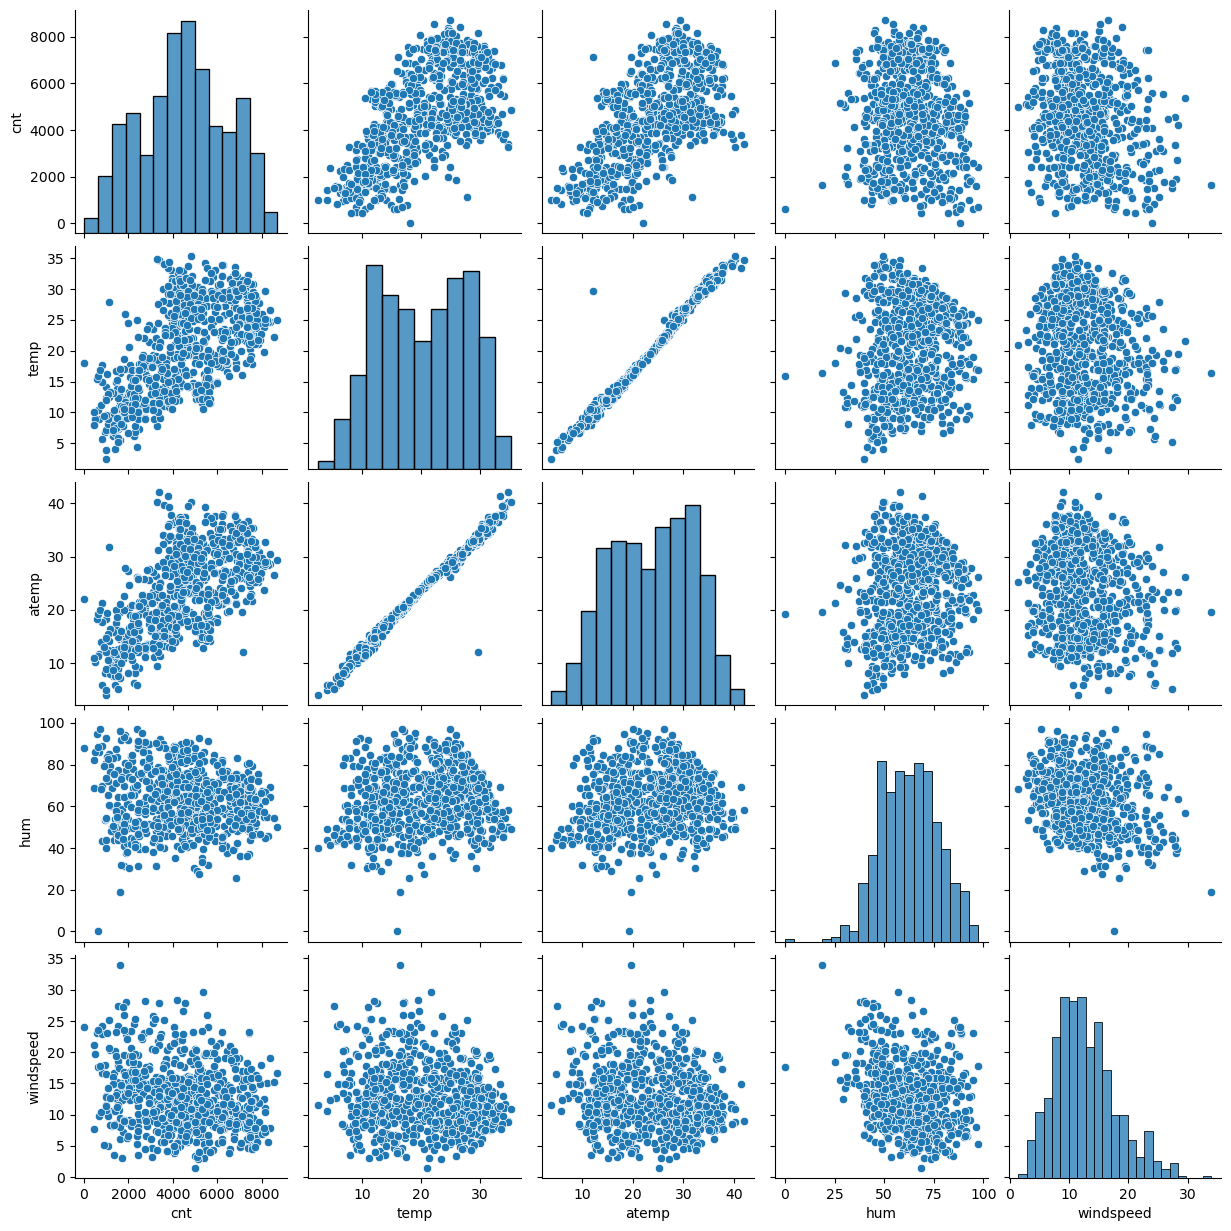

In [574]:
sns.pairplot(df,vars = ['cnt', 'temp','atemp','hum','windspeed'])
plt.show()

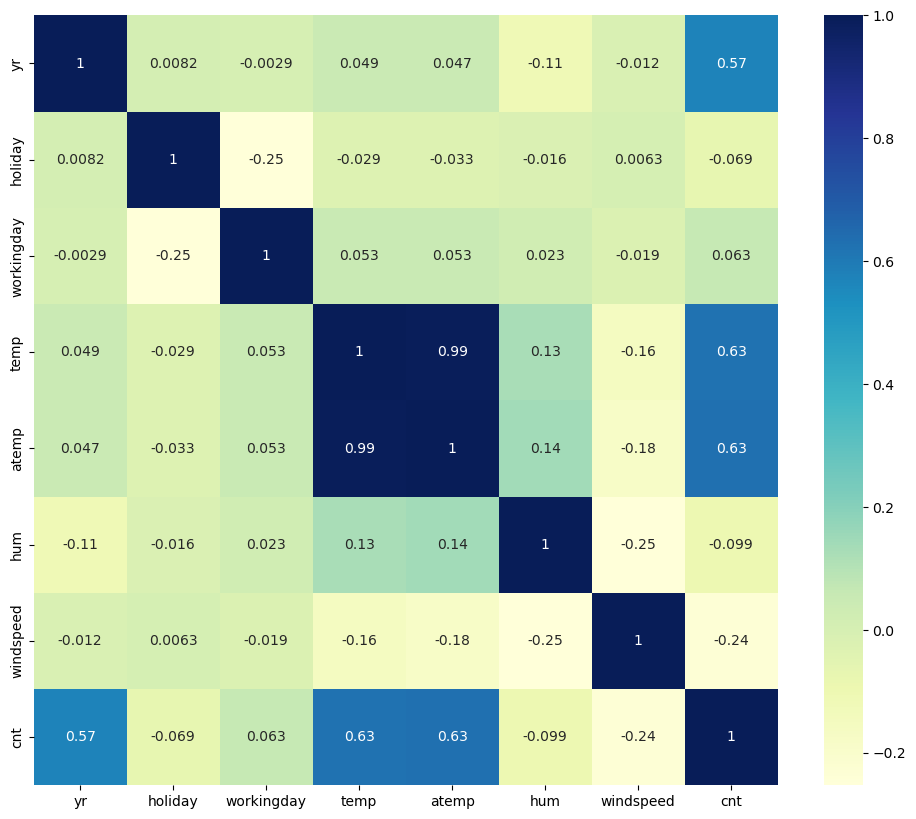

In [575]:
# Checking correlation

plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [576]:
# # As the temperature in Celsius[temp] and feeling temperature in Celsius[atemp] are similar effective variable
# Correlation is 0.99. we can drop oone of them.
# we can drop temp and keep atemp.

df = df.drop(['temp'], axis = 1)

In [577]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


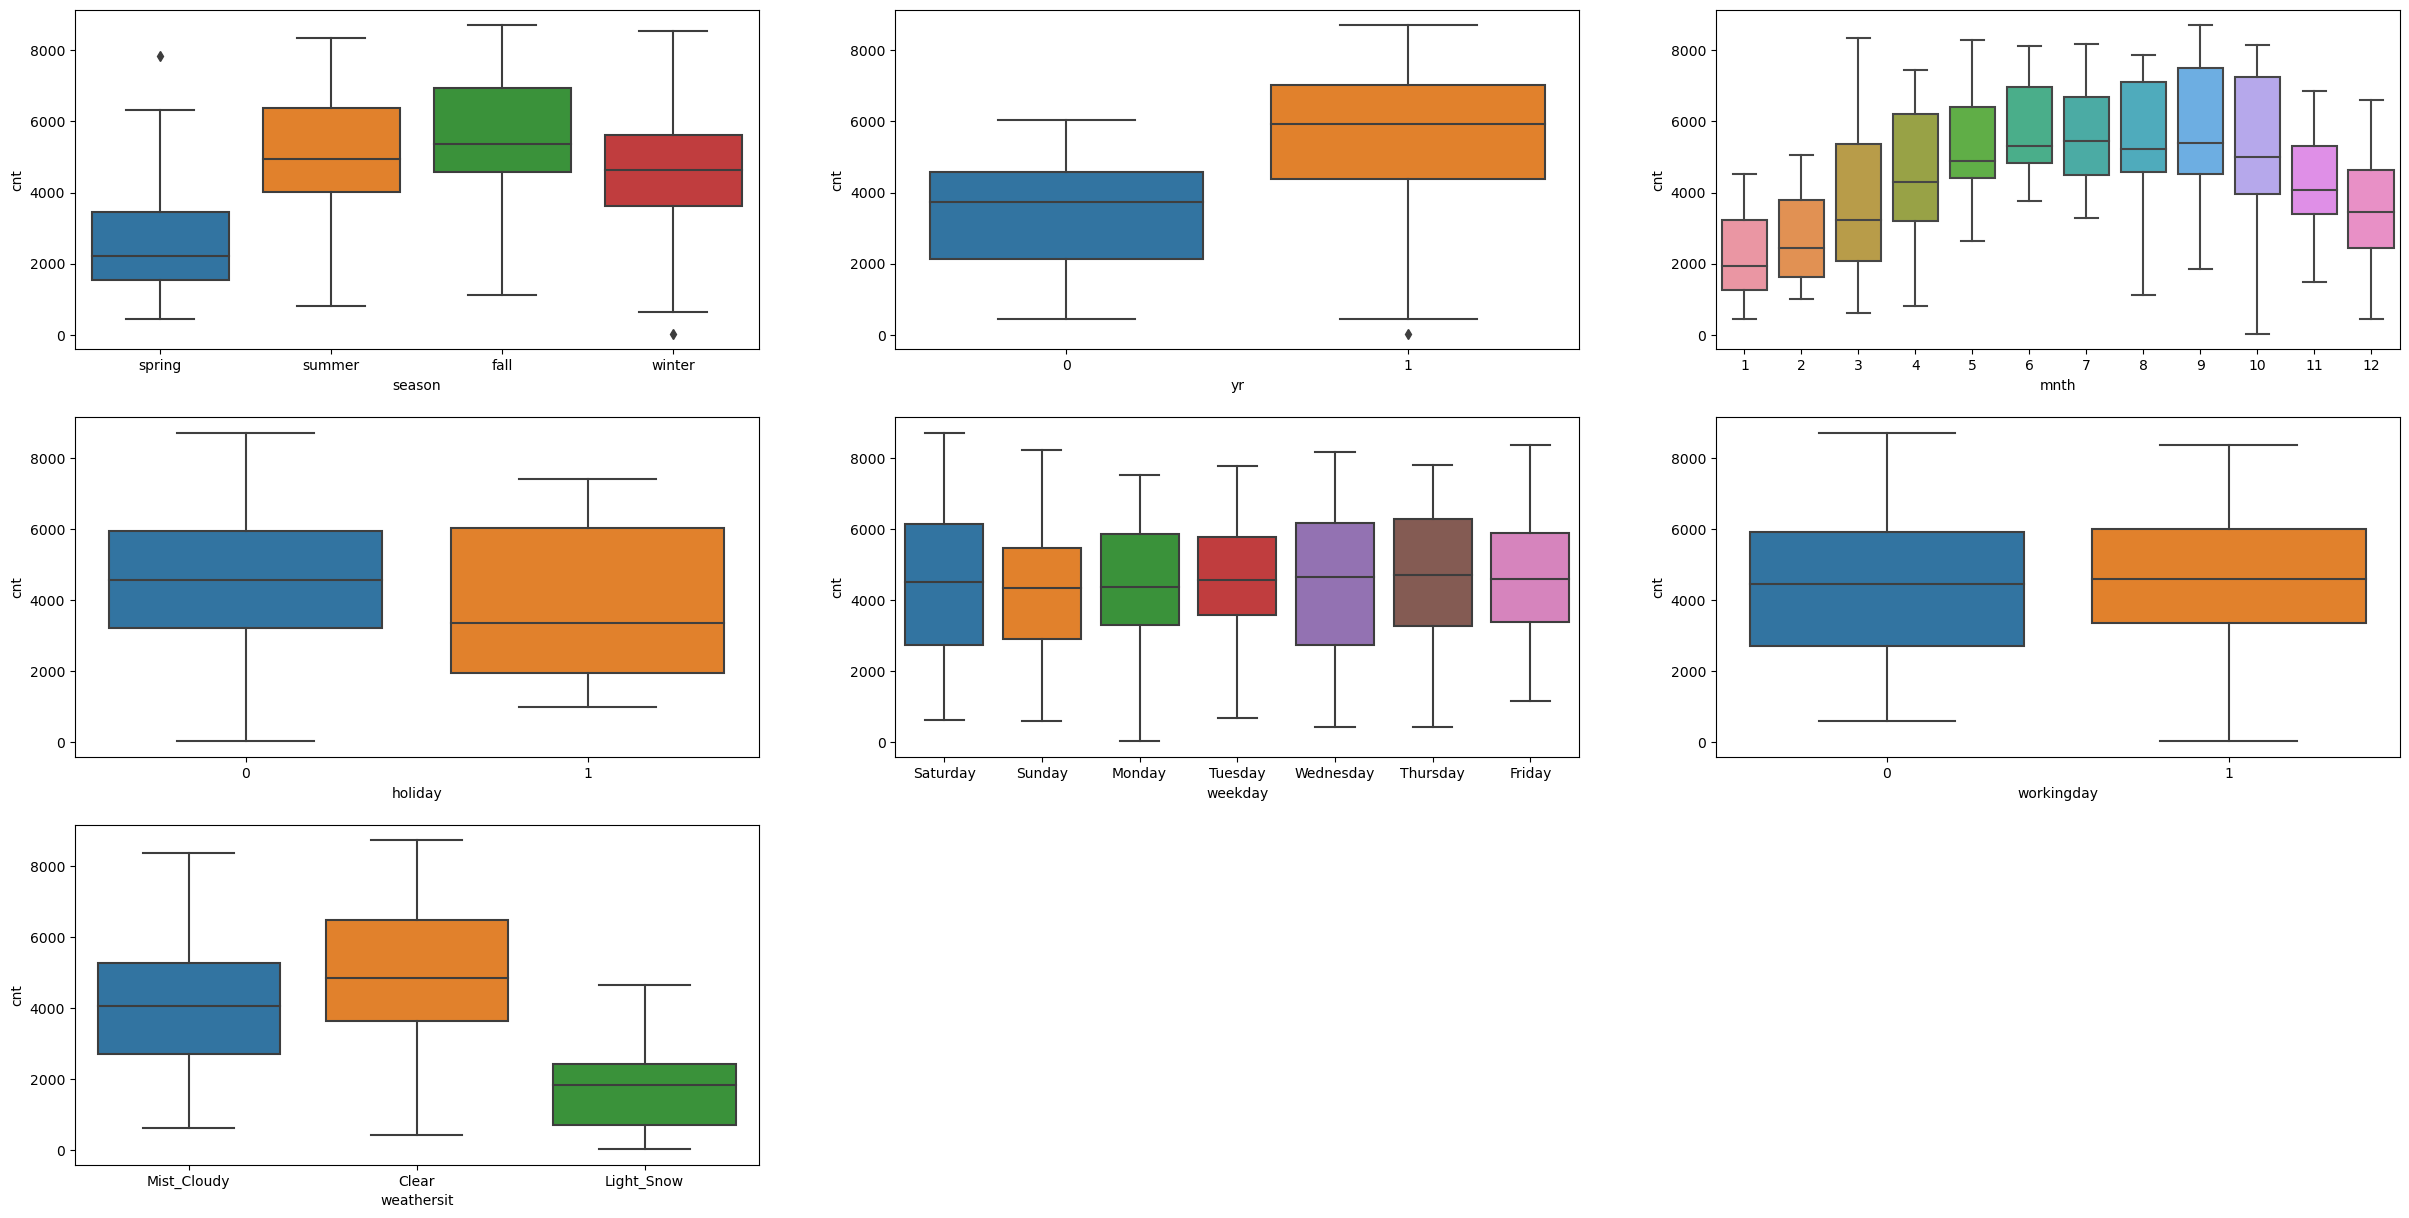

In [578]:
# Boxplot for all categorical Variables.

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Observation
- good results with

 - season fall
 - weathersit clear
 - yr 01 2019
 - weekday Thursday
 - workingday 1 - day is neither weekend nor holiday
 - mnth 9 [September]






# STEP - 2 : Data Preparation for modelling

### a. Dummy variables


In [579]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [580]:
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [581]:
# Creating dummies for season, mnth, weekday, weathersit

Season_type=pd.get_dummies(df['season'],drop_first=True)
Weather_type=pd.get_dummies(df['weathersit'],drop_first=True)
Days_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)





In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [583]:
# Concat in dataframe

df=pd.concat([df,Season_type],axis=1)
df=pd.concat([df,Weather_type],axis=1)
df=pd.concat([df,Days_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   atemp        730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  spring       730 non-null    uint8  
 12  summer       730 non-null    uint8  
 13  winter       730 non-null    uint8  
 14  Light_Snow   730 non-null    uint8  
 15  Mist_Cloudy  730 non-null    uint8  
 16  Monday       730 non-null    uint8  
 17  Saturday     730 non-null    uint8  
 18  Sunday       730 non-null    uint8  
 19  Thursday

In [584]:
# Removing the original one
df = df.drop(['season','mnth','weekday','weathersit'],axis=1)


In [585]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   atemp        730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  Light_Snow   730 non-null    uint8  
 11  Mist_Cloudy  730 non-null    uint8  
 12  Monday       730 non-null    uint8  
 13  Saturday     730 non-null    uint8  
 14  Sunday       730 non-null    uint8  
 15  Thursday     730 non-null    uint8  
 16  Tuesday      730 non-null    uint8  
 17  Wednesday    730 non-null    uint8  
 18  2            730 non-null    uint8  
 19  3       

### b. Spliting data in training set (70%) and test set (30%)


In [587]:
# Import libraries

import sklearn
from sklearn.model_selection import train_test_split


In [588]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [589]:
# Splitting into training set (70%) and test set (30%)

# np.random.seed(0)
# df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

# Original shape (730, 16)

(510, 29)
(219, 29)


In [590]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [591]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### c. Rescaling the Features

using MinMaxScaler

In [592]:
# Apply scaler() to all the numerical columns.

# Need Library
from sklearn.preprocessing import MinMaxScaler


# 1. Instantiate an object

scaler=MinMaxScaler()

# 2. Create a list of numeric vars

num_vars = ['cnt','atemp','hum','windspeed']

# 3. Fit on data

#scaler.fit_transform()
    
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [593]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [594]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [595]:
df_train[num_vars].describe()

,cnt,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.512989,0.650369,0.320768
std,0.224593,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.332086,0.538643,0.199179
50%,0.518638,0.526811,0.653714,0.296763
75%,0.684710,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


# STEP 3 : Training the model


## Dividing into X and Y sets for the model building

In [596]:
y_train = df_train.pop('cnt')
X_train = df_train

In [597]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# RFE - Recursive feature elimination

In [598]:
# Importing RPE and LinearRegression

# Import Library

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [599]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE( lm, n_features_to_select=15)        
rfe = rfe.fit(X_train, y_train)

In [600]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9)]

In [601]:
# The columns which are TRUE means important 

col = X_train.columns[rfe.support_]
col

Index([         'yr',     'holiday',       'atemp',         'hum',
         'windspeed',      'spring',      'winter',  'Light_Snow',
       'Mist_Cloudy',             3,             4,             5,
                   6,             8,             9],
      dtype='object')

In [602]:
# The columns which are FALSE means not important 
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [603]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_Snow,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Building model using statsmodel, for the detailed statistics

In [604]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [605]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,Light_Snow,Mist_Cloudy,3,4,5,6,8,9
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [606]:
# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [607]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [608]:
# Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          8.06e-186
Time:                        01:08:37   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2995      0.034      8.909      

In [609]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_Cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [610]:
X_train.columns

Index([         'yr',     'holiday',  'workingday',       'atemp',
               'hum',   'windspeed',      'spring',      'summer',
            'winter',  'Light_Snow', 'Mist_Cloudy',      'Monday',
          'Saturday',      'Sunday',    'Thursday',     'Tuesday',
         'Wednesday',             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12],
      dtype='object')

In [611]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light_Snow,Mist_Cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [612]:
# Dropping 1st variable > 5
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [613]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()




In [614]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.75e-183
Time:                        01:08:37   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2151      0.027      7.900      

Observation - 
- R-squared:    Slightly increased
- all P-values < 0.05
 

In [615]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_Cloudy,1.55
9,4,1.54


In [616]:
# Dropping atemp as > 2

X_train_rfe=X_train_rfe.drop(['atemp'], axis=1)

In [617]:
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.90e-153
Time:                        01:08:37   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5082      0.018     28.983      

In [618]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_Cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [619]:
# Dropping windspeed sint it is > 2

In [620]:
X_train_rfe=X_train_rfe.drop(['windspeed'], axis=1)

In [621]:
X_train_rfe3=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          9.96e-148
Time:                        01:08:38   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4616      0.016     29.102      

In [622]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist_Cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [623]:
# VIF are ok for now, but in  OLS Regression Results -> p-value for winter is > 0.05 which is insignificant.
# Lets drop it.

In [624]:
X_train_rfe= X_train_rfe.drop(['winter'], axis=1)

In [625]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          9.28e-149
Time:                        01:08:38   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4552      0.011     42.608      

In [626]:
# In  OLS Regression Results -> p-value for column 4 is > 0.05 which is insignificant.

In [627]:
X_train_rfe = X_train_rfe.drop([4], axis=1)

In [628]:
# Checking OLS Regression results

X_train_rfe5=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.76e-149
Time:                        01:08:38   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4493      0.010     44.546      

In [629]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_Cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light_Snow,1.02


# Try and error

In [630]:
# By taking refernce from box plots, Let's add Thursday and check OLS and VIF results. 

In [631]:
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Thursday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [632]:
X_train_rfe6=sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.47e-148
Time:                        01:08:39   Log-Likelihood:                 406.42
No. Observations:                 510   AIC:                            -788.8
Df Residuals:                     498   BIC:                            -738.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4488      0.010     43.696      

In [633]:
#Thursday has high p-value so we drop it.

X_train_rfe=X_train_rfe.drop(['Thursday'], axis=1)

In [634]:
# Let's add Tuesday and check OLS and VIF results. 

In [635]:
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Tuesday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [636]:
X_train_rfe7=sm.add_constant(X_train_rfe)
lm7=sm.OLS(y_train, X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.40e-148
Time:                        01:08:39   Log-Likelihood:                 406.44
No. Observations:                 510   AIC:                            -788.9
Df Residuals:                     498   BIC:                            -738.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4486      0.010     43.399      

In [637]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.53
2,spring,1.40
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.13
6,5,1.11
9,9,1.11
10,Tuesday,1.11
7,6,1.06
1,holiday,1.03


In [638]:
#Tuesday has high p-value so we drop it.

X_train_rfe=X_train_rfe.drop(['Tuesday'], axis=1)

In [639]:
# Let's add Sunday and check OLS and VIF results. 

In [640]:
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [641]:
X_train_rfe8=sm.add_constant(X_train_rfe)
lm8=sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.81e-150
Time:                        01:08:39   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4579      0.010     44.346      

In [642]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [643]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [644]:
# Observation
#Sunday is improving VIF and OLS

In [645]:
# Adding Wednesday and check VIF and OLS
X_train_rfe['Wednesday']=X_train['Wednesday']

In [646]:
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Sunday,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [647]:
X_train_rfe8=sm.add_constant(X_train_rfe)
lm8=sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.04e-149
Time:                        01:08:40   Log-Likelihood:                 411.94
No. Observations:                 510   AIC:                            -797.9
Df Residuals:                     497   BIC:                            -742.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4569      0.011     43.270      

In [648]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.56
2,spring,1.43
4,Mist_Cloudy,1.38
5,3,1.23
11,Wednesday,1.20
8,8,1.13
10,Sunday,1.13
6,5,1.12
9,9,1.12
7,6,1.09


In [649]:
# Observation
# P value of Wednesday is high, removing it.
X_train_rfe = X_train_rfe.drop(['Wednesday'], axis=1)

In [650]:
# Let's add workingday and check VIF and OLS results
X_train_rfe['workingday']= X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Sunday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [651]:
X_train_rfe9=sm.add_constant(X_train_rfe)
lm9=sm.OLS(y_train, X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.18e-149
Time:                        01:08:40   Log-Likelihood:                 411.87
No. Observations:                 510   AIC:                            -797.7
Df Residuals:                     497   BIC:                            -742.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4610      0.015     30.733      

In [652]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,workingday,2.56
0,yr,1.85
2,spring,1.55
4,Mist_Cloudy,1.48
10,Sunday,1.27
5,3,1.24
6,5,1.19
8,8,1.19
9,9,1.16
7,6,1.14


In [653]:
# P value for workingday is large, removing workingday
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [654]:
# LEt's check by adding month 10 and check VIF and OLS

In [655]:
X_train_rfe[10]=X_train[10]

In [656]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10=sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.80e-154
Time:                        01:08:40   Log-Likelihood:                 423.18
No. Observations:                 510   AIC:                            -820.4
Df Residuals:                     497   BIC:                            -765.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4411      0.011     41.212      

In [657]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.59
2,spring,1.43
4,Mist_Cloudy,1.41
5,3,1.23
11,10,1.16
8,8,1.13
10,Sunday,1.13
6,5,1.12
9,9,1.12
7,6,1.07


In [658]:
# Observation
#Model improved by adding month 10

In [659]:
# Adding month 7 and check VIF and OLS
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow,Mist_Cloudy,3,5,6,8,9,Sunday,10,7
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [660]:
X_train_rfe11=sm.add_constant(X_train_rfe)
lm11=sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.24e-162
Time:                        01:08:41   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4085      0.011     35.898      

In [661]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
11,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
12,7,1.09


In [662]:
# Observation
#Model improved by adding month 7

# overall observation

Model 11 has cover most of the columns and giving good results,  SO we will use model 11.

In [663]:
# Predict values
y_train_cnt=lm11.predict(X_train_rfe11)

# Calculate Residuals

In [664]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [665]:
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

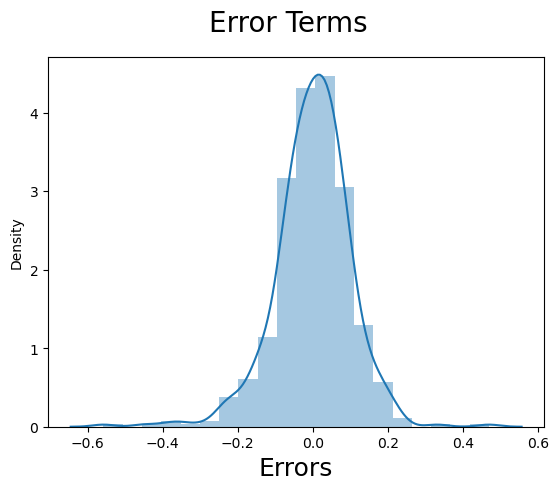

In [666]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
 
# Plot heading 
    
fig.suptitle('Error Terms', fontsize = 20) 

# X-label

plt.xlabel('Errors', fontsize = 18)   

# Observation
Shows good results

# Making Prediction
# Run model on Test set


In [667]:
# Scaling the test set
num_vars = ['cnt', 'hum','windspeed','atemp']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [668]:
# Dividing into X and y_test

y_test=df_test.pop('cnt')
X_test= df_test

In [669]:
X_train_new=X_train_rfe11.drop(['const'], axis=1)

In [670]:
# Now let's use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [671]:
X_train_rfe11.columns

Index([      'const',          'yr',     'holiday',      'spring',
        'Light_Snow', 'Mist_Cloudy',             3,             5,
                   6,             8,             9,      'Sunday',
                  10,             7],
      dtype='object')

In [672]:
# Making predictions
y_pred=lm11.predict(X_test_new)

# Model Evaluation


In [673]:
# Plotting y_test and y_pred to understand the spread.


Text(0, 0.5, 'y_pred')

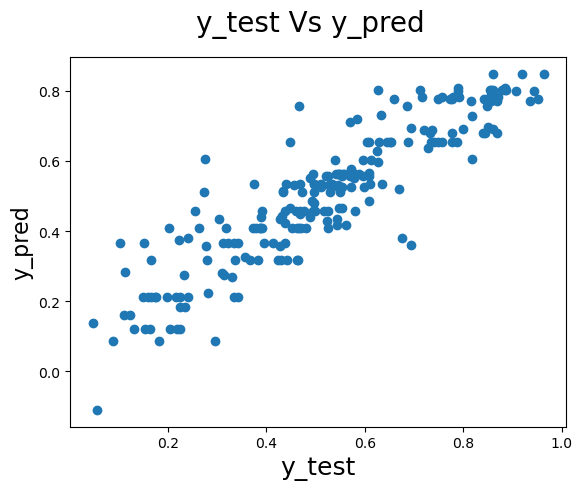

In [674]:
fig=plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test Vs y_pred', fontsize=20)  # plot heading
plt.xlabel('y_test', fontsize=18)   # X-label
plt.ylabel('y_pred', fontsize=16)   # Y-label

# Observations
As per plot y_test Vs y_pred, the plotted points are overlapping and close to each other. Hence we can say that our model is can predict very well.


In [675]:
# Checking r2_score

In [676]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [677]:
# Return the mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

0.09613954749599135

In [678]:
# Calculate the r-square
r_squared = r2_score(y_test, y_pred)
r_squared

0.8053972981470611

In [680]:
# Observation
#calculated r_squared is close to our model r_squared value i.e  0.797

In [681]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.24e-162
Time:                        01:11:18   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4085      0.011     35.898      

# Best Fit Equation is

cnt = 0.2469xyr - 0.0836xholiday - 0.1980xspring - 0.3212xLight_Snow - 0.0907xMist_Cloudy + 0.0635x3 + 0.1230x5 + 0.1483x6 + 0.1538x8 + 0.1937x9 -  0.0498xSunday + 0.1168x10 + 0.1264x7

# Observations and recommondations
- Demand is high in yr, holiday, spring, Light_Snow, Mist_Cloudy,3,5,6,7,8,9,10,Sunday.
- High demand in months  ,3,5,6,7,8,9,10.
- High demand in weather condition - Light_Snow and Mist_Cloudy
- High demand season - spring